In [2]:
!pip install pandas

In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('data/cars.csv' ,index_col='Unnamed: 0')
df

In [8]:
x_data = df['speed'].values
y_data = df['dist'].values

In [ ]:
plt.scatter(x_data, y_data )
plt.show()

In [10]:
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)

In [11]:
w = tf.Variable( tf.random.uniform([1]))
b = tf.Variable( tf.random.uniform([1]))

In [14]:
def compute_loss():
    hx = w*x + b
    c = tf.reduce_mean( (hx-y)**2 )
    return c

In [ ]:
optimizer = Adam(learning_rate=0.01)
hist_cost=[]
for i in range( 1000):
    optimizer.minimize( compute_loss, var_list=[w,b])
    c = compute_loss().numpy()
    hist_cost.append( c ) 
    print( i, 'cost=', c)

In [19]:
print( w.numpy(), b.numpy())

[2.793962] [1.8418279]


In [20]:
def hxFn( xdata ):
    hx = w*xdata + b
    return hx.numpy()

In [21]:
hxFn( 10 )

array([29.781448], dtype=float32)

In [22]:
hxFn( [5,6])   # [5,6]*[2.79,2.79] + [1.8,1.8]

array([15.811638, 18.605598], dtype=float32)

In [ ]:
pred = hxFn( x )
pred

In [ ]:
plt.scatter( x,y)
plt.plot( x, pred,'r--')
plt.show()

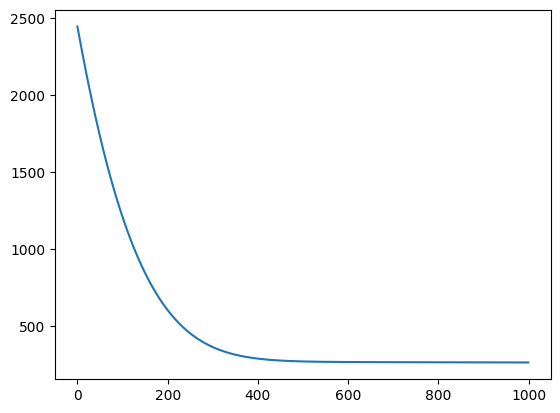

In [28]:
plt.plot( hist_cost )
plt.show()